In [10]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [11]:
x=[3.047102,
3.066862,
3.083525,
3.097783,
3.110131,
3.120934,
3.130472,
3.138955,
3.146553,
3.153399,
3.1596,
3.178291,
3.18297,
3.187271,
3.191222,
3.206589,
3.209582,
3.212359,
3.214942,
3.227988,
3.229923,
3.231734,
3.233432,
3.244768,
3.246005]
y=[-1.036625,
-0.949195,
-0.83889,
-0.768505,
-0.7167,
-0.65561,
-0.5986,
-0.54516,
-0.50599,
-0.457925,
-0.42251,
-0.388925,
-0.346895,
-0.30681,
-0.27737,
-0.24033,
-0.213335,
-0.18709,
-0.15366,
-0.129375,
-0.09806,
-0.0752,
-0.04576,
-0.01728,
-0.00349]
N=len(x)
delx=(x[-1] - x[0])/100
delx1=x[0]
X=[delx1]
for i in range (0,100,1):
    delx1+=delx
    X.append(delx1)

In [12]:
def matrix(n):
    N= len(x)
    sum_list=[]
    Y_list=[]
    matM =np.zeros((n+1,n+1))
    matY =np.zeros(n+1)
    for i in range (2*n+1):
        sum=0
        Y=0
        for j in x:
            sum+= j**i
        for k in range (0,N):
            Y+= (x[k]**i)*y[k]
        sum_list.append(sum)
        Y_list.append(Y)
    for i in range(n+1):
        for j in range(n+1):
            matM[i][j] = sum_list[j+i]
    return (matM)
 

In [13]:
def matrixY(n):
    N= len(x)
    sum_list=[]
    Y_list=[]
    matM =np.zeros((n+1,n+1))
    matY =np.zeros(n+1)
    for i in range (2*n+1):
        sum=0
        Y=0
        for j in x:
            sum+= j**i
        for k in range (0,N):
            Y+= (x[k]**i)*y[k]
        sum_list.append(sum)
        Y_list.append(Y)
    for i in range(n+1):
        matY[i]=Y_list[i]
    return(matY)

In [14]:
def Lower(n,matM,matY):
    lowerM=np.zeros((n+1,n+1))
    upperM=np.zeros((n+1,n+1))
    P=np.zeros(n+1)
    for i in range(n+1):
        for j in range(i,n+1):
            sum = 0;
            for k in range (i):
                sum+=(lowerM[i][k])*(upperM[k][j]);
            upperM[i][j]=matM[i][j]-sum;
        for j in range(i,n+1):
            if(i==j):
                lowerM[i][i]=1;
            else:
                sum = 0
                for k in range (i):
                    sum+=(lowerM[j][k])*(upperM[k][i]);
                lowerM[j][i]=(matM[j][i]-sum)/upperM[i][i];
            
    return(lowerM)
            

In [15]:
def Upper(n,matM,matY):
    lowerM=np.zeros((n+1,n+1))
    upperM=np.zeros((n+1,n+1))
    P=np.zeros(n+1)
    for i in range(n+1):
        for j in range(i,n+1):
            sum = 0;
            for k in range (i):
                sum+=(lowerM[i][k])*(upperM[k][j]);
            upperM[i][j]=matM[i][j]-sum;
        for j in range(i,n+1):
            if(i==j):
                lowerM[i][i]=1;
            else:
                sum = 0
                for k in range (i):
                    sum+=(lowerM[j][k])*(upperM[k][i]);
                lowerM[j][i]=(matM[j][i]-sum)/upperM[i][i];
            
    return(upperM)

In [16]:
def YmatrixLU(n,matY,lowerM):
    P=np.zeros(n+1)
    for i in range (n+1):
        P[i]=matY[i]/lowerM[i][i];
        for j in range(0,i):
            P[i]=P[i]-(lowerM[i][j]*P[j])/lowerM[i][i];
    return(P)

In [17]:
def finalmatrix(n,P,upperM):
    matA = np.zeros(n+1)
    for i in range (n,-1,-1):
        matA[i]=P[i]/upperM[i][i];
        for j in range (i+1, n+1):
            matA[i]=matA[i]-(upperM[i][j]*matA[j])/upperM[i][i];
    return(matA)

n= 1
fitting matrix= [-16.7005657    5.14224041]
deviation= -5.80334391653281e-14
sd deviation= 0.007069263987354531


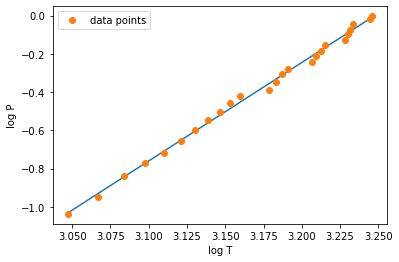

In [18]:
ns=[1]
for i in ns:
    print("n=",i)
    M=matrix(i)
    Y=matrixY(i)
    A=np.zeros(i)
    L=Lower(i,M,Y)
    U=Upper(i,M,Y)
    Pn=YmatrixLU(i,Y,L)
    A=finalmatrix(i,Pn,U)
    print("fitting matrix=",A)
    step=len(A)
    Fn=[]
    for xi in X:
        sum=0
        for p in range(0,step):
            sum=sum + A[p]*(xi)**p
        Fn.append(sum)
    D=0
    S=0
    F=[]
    for xi in x:
        sum=0
        for p in range(0,step):
            sum=sum + A[p]*(xi)**p
        F.append(sum)
    for q in range(0,N):
        D+= y[q]-F[q]
        S+=(y[q]-F[q])**2
    print("deviation=",D)
    print("sd deviation=",S)
    plt.xlabel("log T")
    plt.ylabel("log P")
    plt.plot(X, Fn)
    plt.plot(x, y, 'o', label= "data points")
    plt.legend();